In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM

import librosa
import librosa.display
import IPython.display as ipd


# 1. Creating dataset

### RAVDESS

In [3]:
file_path = '../SpeechER/data/Ravdess/audio_speech_actors_01-24/'
dir_list = os.listdir(file_path)

emotions, path = [], []

for folder in dir_list:
    actor = os.listdir(file_path + folder)
    for file in actor:
        split_file = file.split('.')[0]
        split_file = split_file.split('-')
        emotions.append(int(split_file[2]))
        path.append(file_path + folder + '/' + file)

df_emotion = pd.DataFrame(emotions, columns=['Emotion'])
df_path = pd.DataFrame(path, columns=['Path'])
RAVDESS = pd.concat([df_emotion, df_path], axis=1)
RAVDESS.Emotion.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)
RAVDESS.tail(5)

,Emotion,Path
1435,neutral,../SpeechER/data/Ravdess/audio_speech_actors_0...
1436,disgust,../SpeechER/data/Ravdess/audio_speech_actors_0...
1437,surprise,../SpeechER/data/Ravdess/audio_speech_actors_0...
1438,disgust,../SpeechER/data/Ravdess/audio_speech_actors_0...
1439,happy,../SpeechER/data/Ravdess/audio_speech_actors_0...


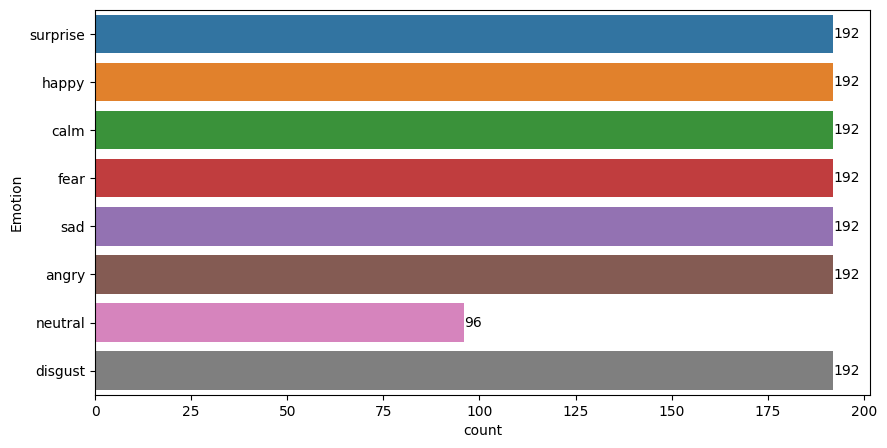

In [11]:
ax = sns.countplot(y='Emotion', data=RAVDESS)
ax.bar_label(ax.containers[0])
ax.figure.set_size_inches(10,5)
plt.show()

### CREMA

In [7]:
file_path = '../SpeechER/data/Crema/'
dir_list = os.listdir(file_path)

emotions, path = [], []

for file in dir_list:
    path.append(file_path + file)
    split_file = file.split('_')
    
    if split_file[2] == 'SAD':
        emotions.append('sad')
    elif split_file[2] == 'ANG':
        emotions.append('angry')
    elif split_file[2] == 'FEA':
        emotions.append('fear')
    elif split_file[2] == 'DIS':
        emotions.append('disgust')
    elif split_file[2] == 'HAP':
        emotions.append('happy')
    elif split_file[2] == 'NEU':
        emotions.append('neutral')
    else:
        emotions.append('UN')

df_emotion = pd.DataFrame(emotions, columns=['Emotion'])
df_path = pd.DataFrame(path, columns=['Path'])
CREMA = pd.concat([df_emotion, df_path], axis=1)
CREMA.tail(5)


,Emotion,Path
7437,disgust,../SpeechER/data/Crema/1015_MTI_DIS_XX.wav
7438,neutral,../SpeechER/data/Crema/1054_TIE_NEU_XX.wav
7439,neutral,../SpeechER/data/Crema/1081_TAI_NEU_XX.wav
7440,disgust,../SpeechER/data/Crema/1079_IOM_DIS_XX.wav
7441,sad,../SpeechER/data/Crema/1047_ITS_SAD_XX.wav


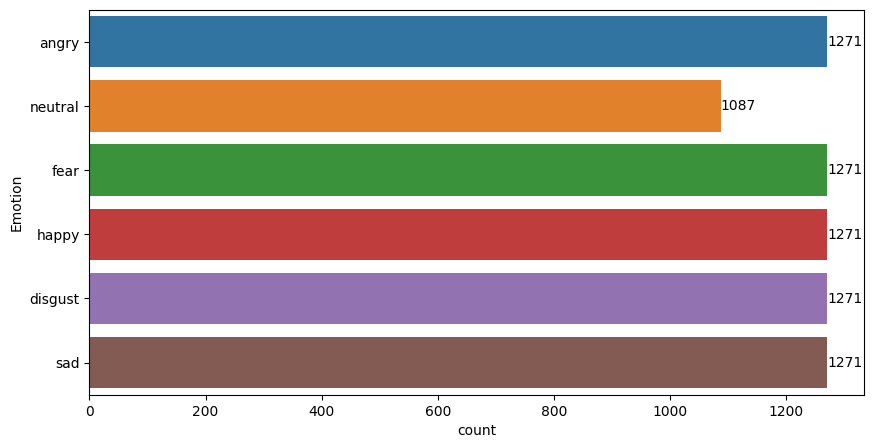

In [10]:
ax = sns.countplot(y='Emotion', data=CREMA)
ax.bar_label(ax.containers[0])
ax.figure.set_size_inches(10,5)
plt.show()

### TESS

In [13]:
file_path = '../SpeechER/data/Tess/'
dir_list = os.listdir(file_path)

emotions, path = [], []

for folder in dir_list:
    emotion_folder = os.listdir(file_path + folder)
    for file in emotion_folder:
        split_file = file.split('.')[0]
        split_file = split_file.split('_')[2]
        if split_file == 'ps':
            emotions.append('surprise')
        else:
            emotions.append(split_file)
        path.append(file_path + folder + '/' + file)

df_emotion = pd.DataFrame(emotions, columns=['Emotion'])
df_path = pd.DataFrame(path, columns=['Path'])
TESS = pd.concat([df_emotion, df_path], axis=1)
TESS.tail(5)

,Emotion,Path
2795,happy,../SpeechER/data/Tess/OAF_happy/OAF_nag_happy.wav
2796,happy,../SpeechER/data/Tess/OAF_happy/OAF_red_happy.wav
2797,happy,../SpeechER/data/Tess/OAF_happy/OAF_ditch_happ...
2798,happy,../SpeechER/data/Tess/OAF_happy/OAF_mess_happy...
2799,happy,../SpeechER/data/Tess/OAF_happy/OAF_have_happy...


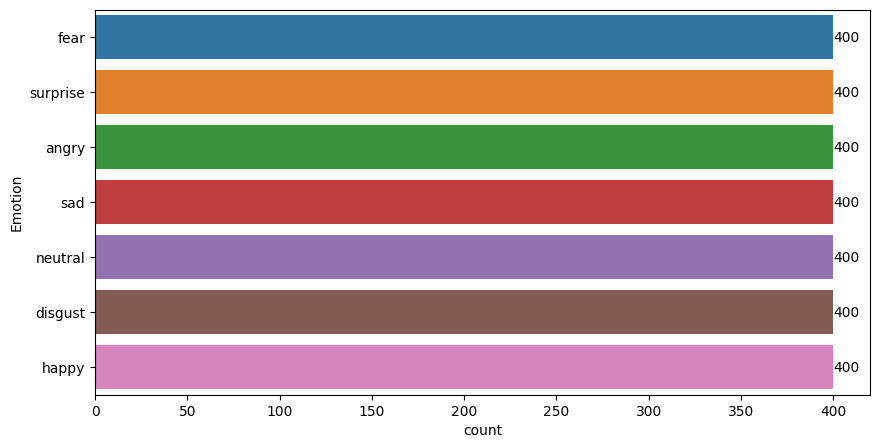

In [14]:
ax = sns.countplot(y='Emotion', data=TESS)
ax.bar_label(ax.containers[0])
ax.figure.set_size_inches(10,5)
plt.show()

### SAVEE

In [15]:
import re
file_path = '../SpeechER/data/Savee/'
dir_list = os.listdir(file_path)

emotions, path = [], []

for file in dir_list:
    path.append(file_path + file)
    split_file = file.split('.')[0].split('_')[1]
    split_file = re.split('(\d+)', split_file)[0]

    if split_file == 'a':
        emotions.append('angry')
    elif split_file == 'd':
        emotions.append('disgust')
    elif split_file == 'f':
        emotions.append('fear')
    elif split_file == 'h':
        emotions.append('happy')
    elif split_file == 'n':
        emotions.append('neutral')
    elif split_file == 'd':
        emotions.append('disgust')
    elif split_file == 'sa':
        emotions.append('sad')
    elif split_file == 'su':
        emotions.append('surprise')

df_emotion = pd.DataFrame(emotions, columns=['Emotion'])
df_path = pd.DataFrame(path, columns=['Path'])
SAVEE = pd.concat([df_emotion, df_path], axis=1)
SAVEE.tail(5)

,Emotion,Path
475,fear,../SpeechER/data/Savee/KL_f04.wav
476,sad,../SpeechER/data/Savee/DC_sa03.wav
477,fear,../SpeechER/data/Savee/DC_f07.wav
478,angry,../SpeechER/data/Savee/JE_a06.wav
479,neutral,../SpeechER/data/Savee/KL_n18.wav


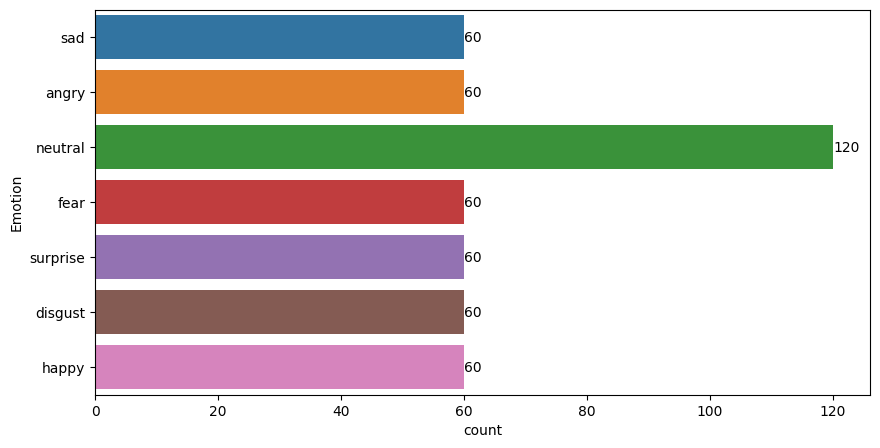

In [16]:
ax = sns.countplot(y='Emotion', data=SAVEE)
ax.bar_label(ax.containers[0])
ax.figure.set_size_inches(10,5)
plt.show()

In [19]:
data = pd.concat([RAVDESS, CREMA, TESS, SAVEE], axis=0)
data = data.reset_index(drop=True)
data.head()

,Emotion,Path
0,surprise,../SpeechER/data/Ravdess/audio_speech_actors_0...
1,happy,../SpeechER/data/Ravdess/audio_speech_actors_0...
2,happy,../SpeechER/data/Ravdess/audio_speech_actors_0...
3,calm,../SpeechER/data/Ravdess/audio_speech_actors_0...
4,fear,../SpeechER/data/Ravdess/audio_speech_actors_0...


# 2. Data Visualization

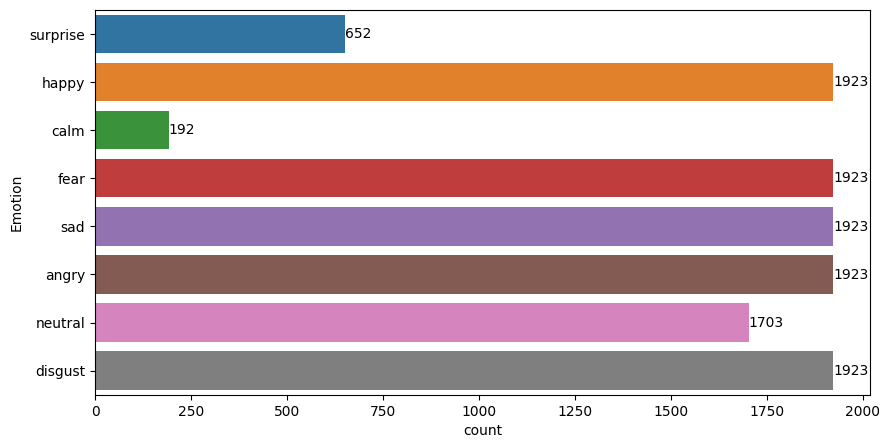

In [24]:
ax = sns.countplot(y='Emotion', data=data)
ax.bar_label(ax.containers[0])
ax.figure.set_size_inches(10,5)
plt.show()

In [20]:
def display_features(index):
    emotion = data['Emotion'][index]
    sample, sample_rate = librosa.load(data['Path'][index])
    mfcc_example = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=13)
    spectogram_example = librosa.amplitude_to_db(abs(librosa.stft(sample)))

    # Audio wave
    plt.figure(figsize=(20, 10))
    plt.subplot(3,1,1)
    librosa.display.waveshow(sample, sr=sample_rate)
    plt.title(f'Emotion: {emotion}')
    plt.show()

    # Spectogram
    plt.figure(figsize=(25, 15))
    plt.subplot(3,1,1)
    librosa.display.specshow(spectogram_example, x_axis='time')
    plt.ylabel('Spectogram')
    plt.colorbar()
    plt.show()
    
    # MFCC
    plt.figure(figsize=(25, 15))
    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc_example, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()
    plt.show()


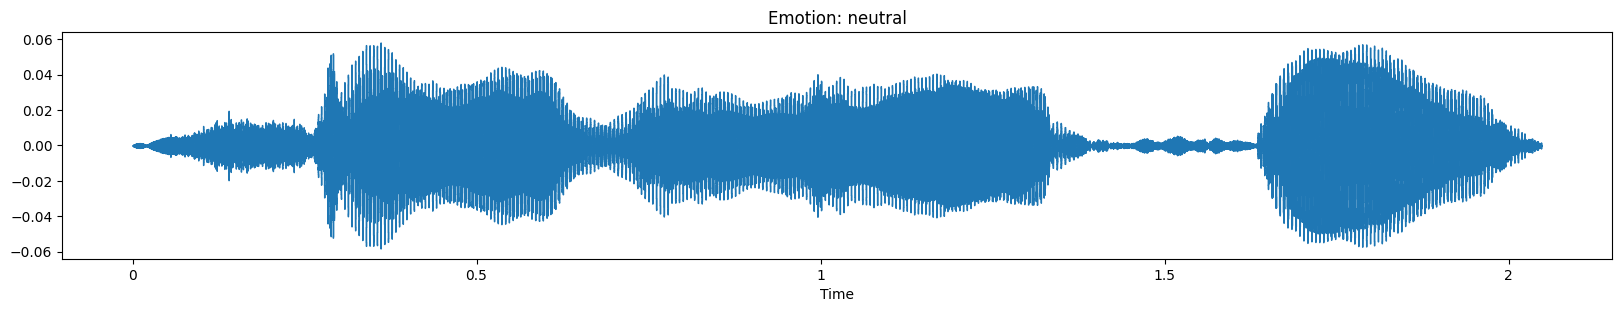

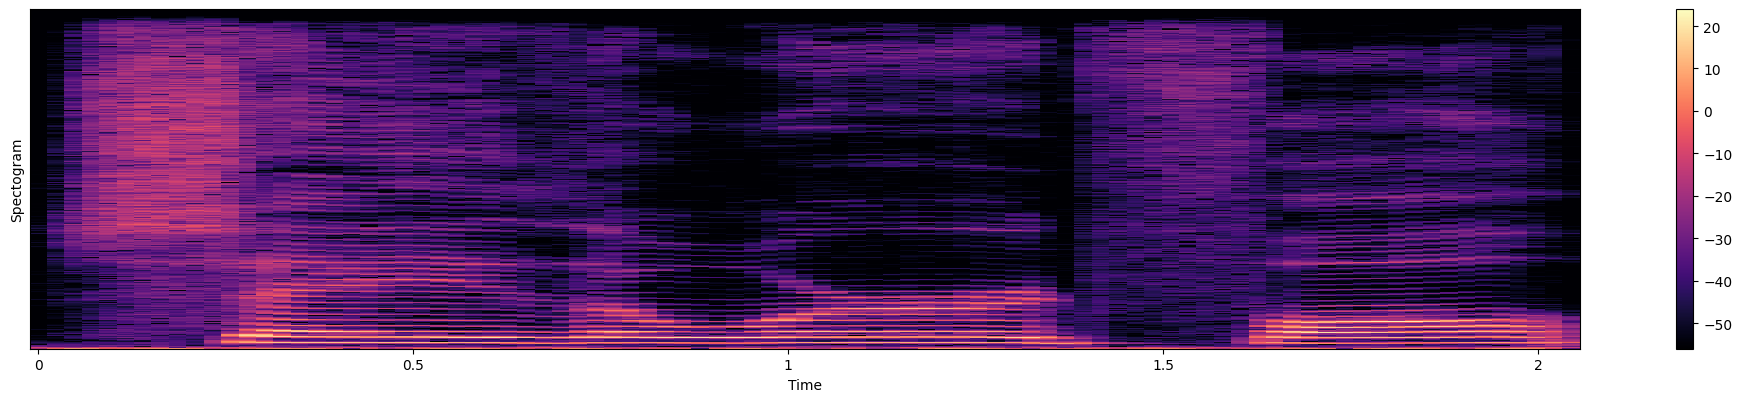

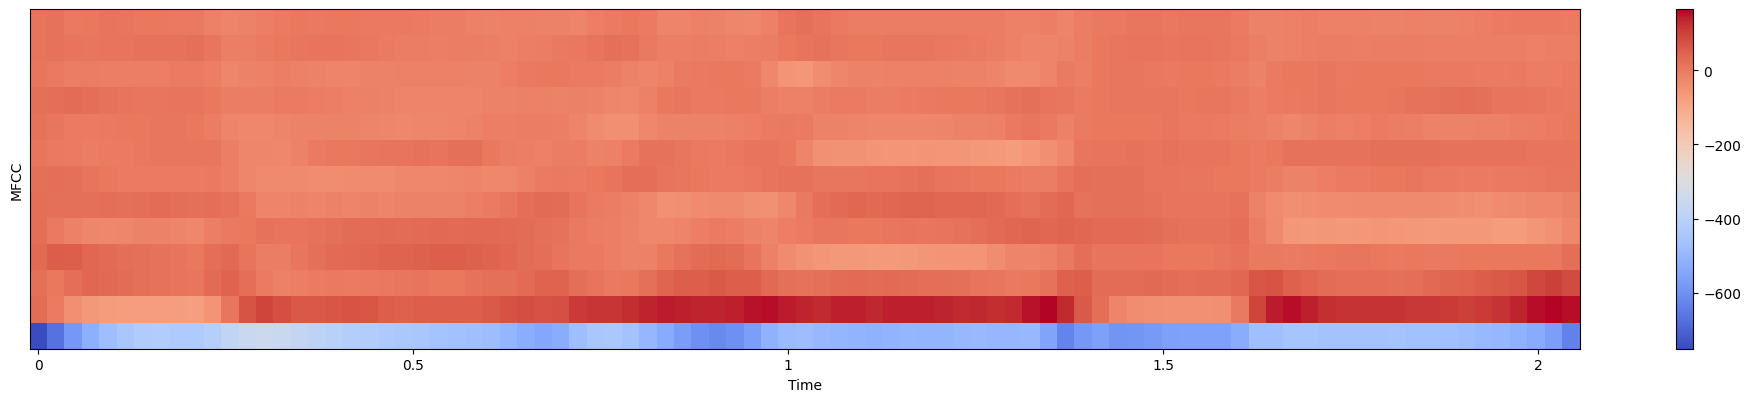

'../SpeechER/data/Tess/OAF_neutral/OAF_fall_neutral.wav'

In [22]:
example = 10233
display_features(10233)
ipd.Audio(data['Path'][10233])
data['Path'][example]

## 2.1. Data Diversifying

In [11]:
def noise(file):
    noise_amp = 0.045*np.random.uniform()*np.amax(file)
    file = file + noise_amp*np.random.normal(size=file.shape[0])
    return file

def shift(file):
    range = int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(file, range)

def pitch(file, sampling_rate):
    return librosa.effects.pitch_shift(file, sr=sampling_rate, n_steps=0.8)

def stretch(file):
    return librosa.effects.time_stretch(file, rate=0.8)

Text(0.5, 1.0, 'Stretch')

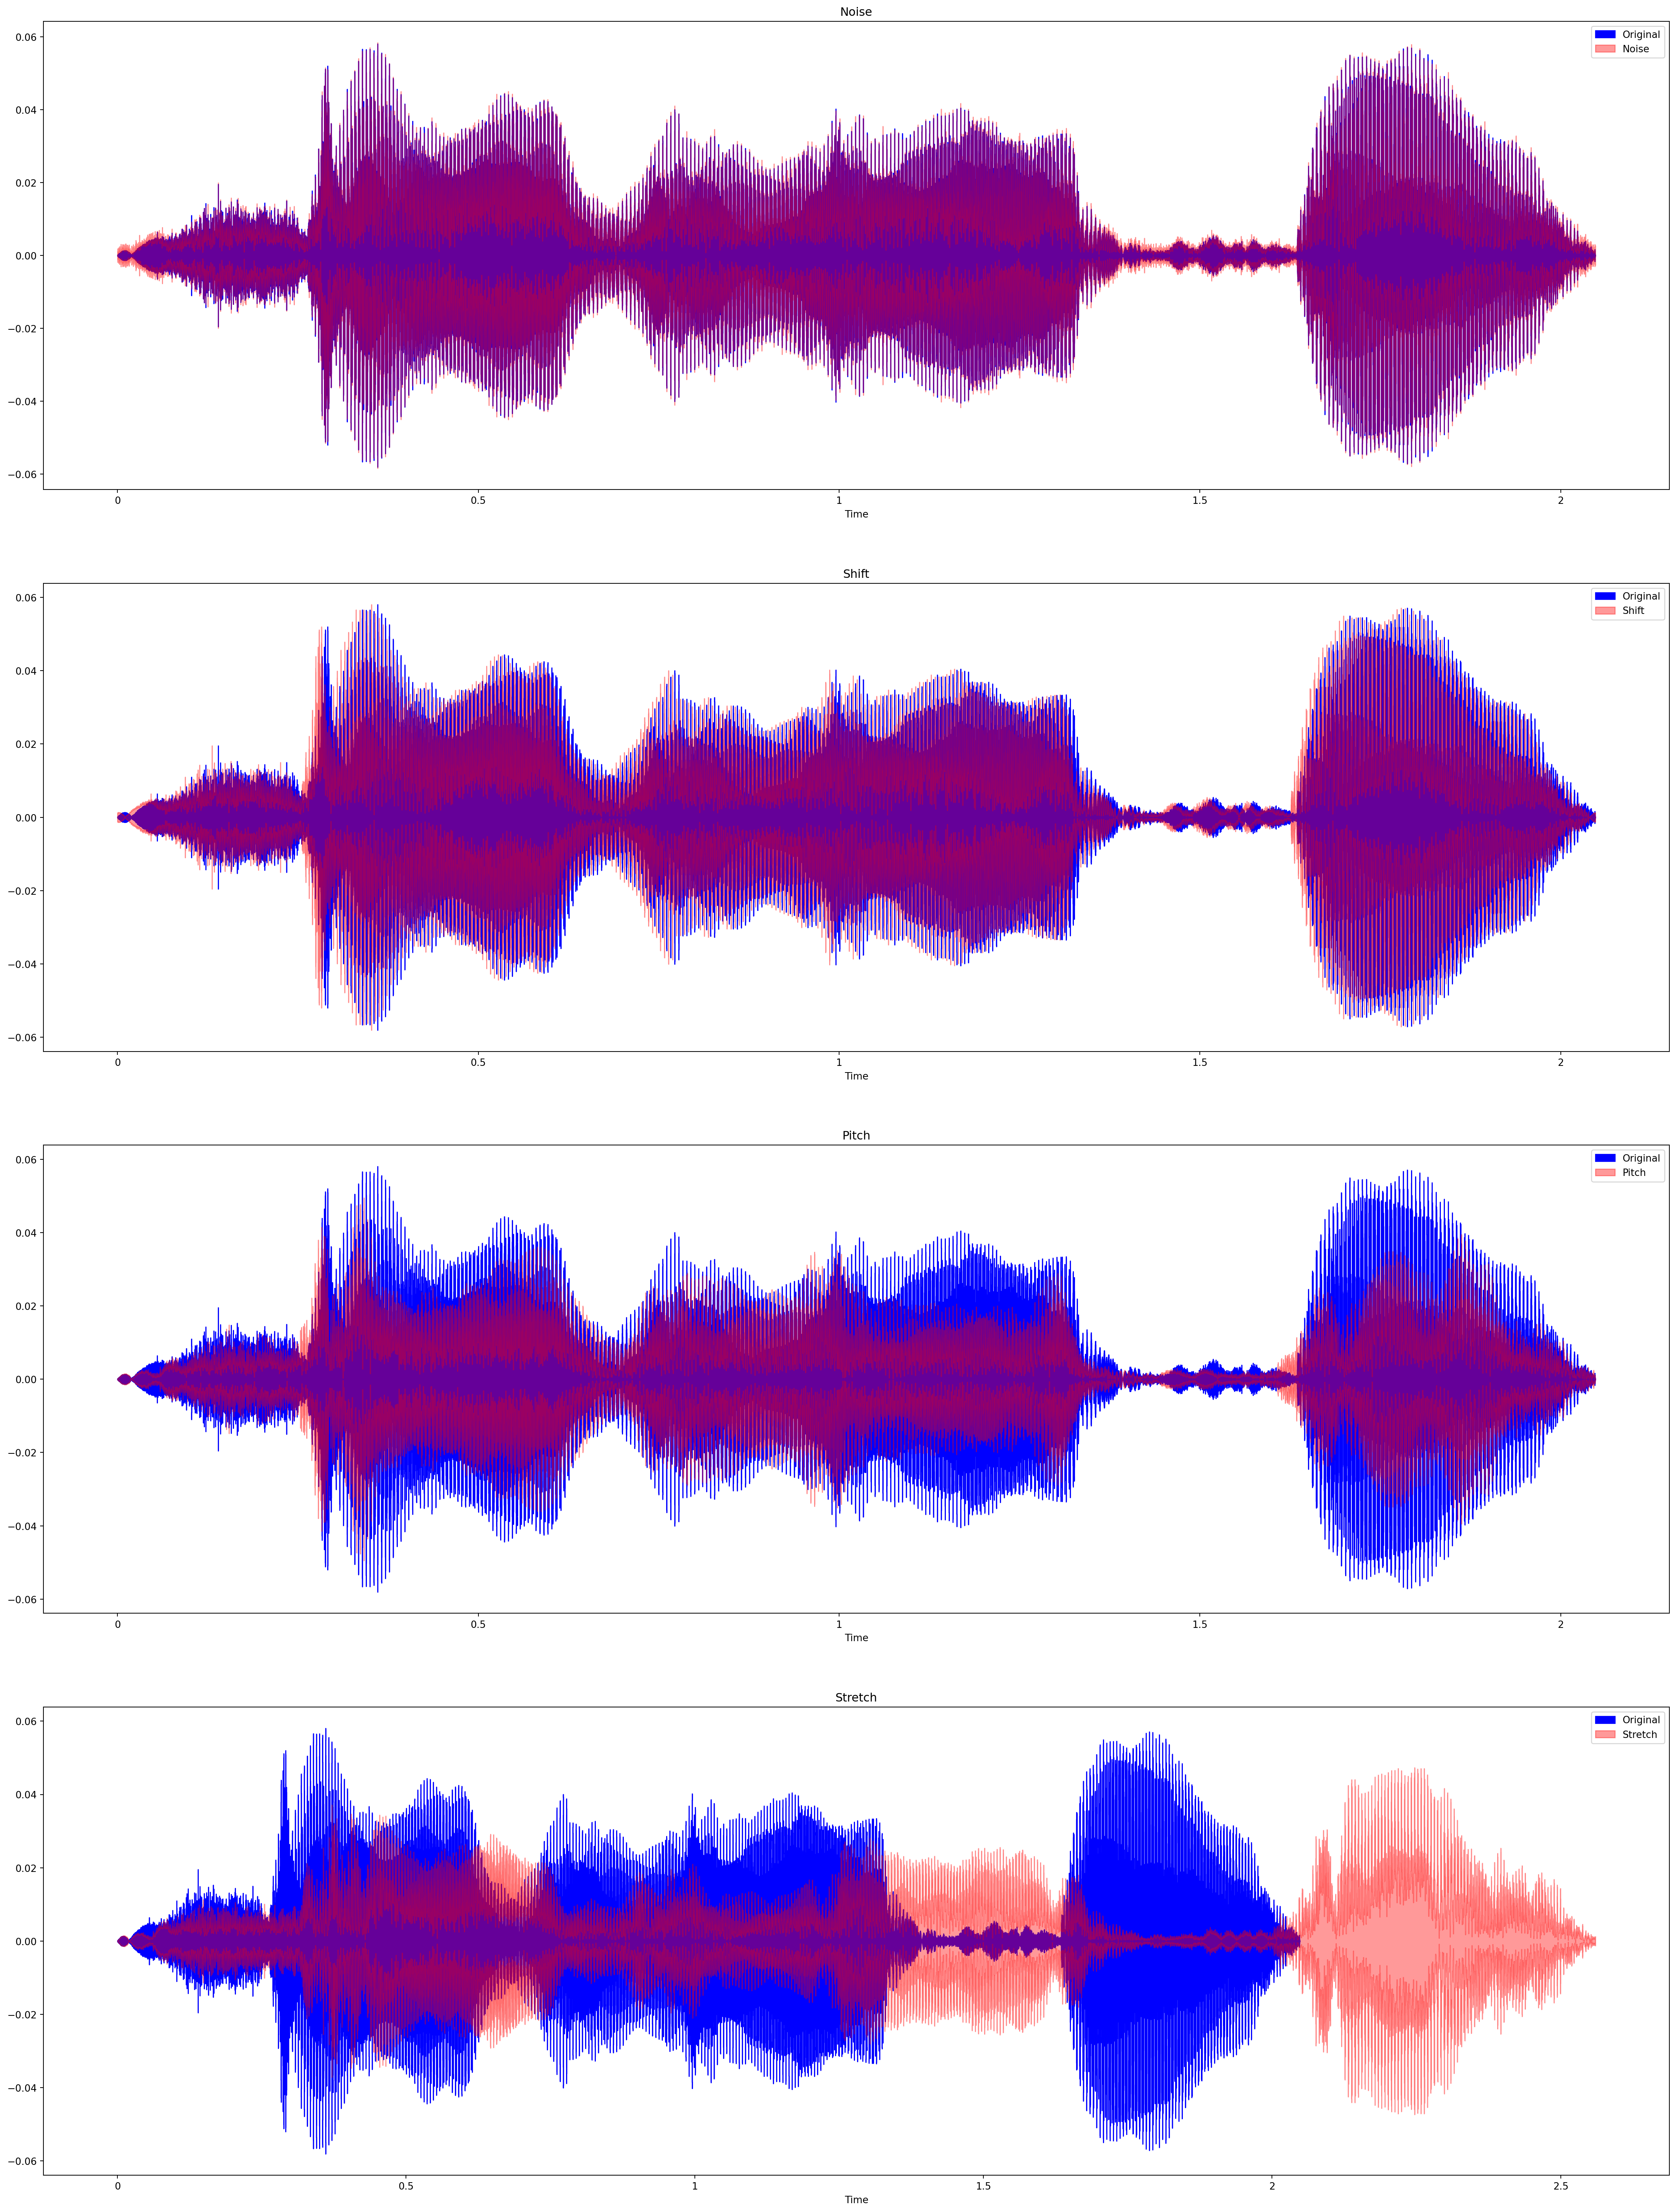

In [12]:
x, sr = librosa.load(np.array(data.Path)[example])
fig, ax = plt.subplots(4, figsize=(30,40))
fig.set_dpi(190)

librosa.display.waveshow(y=x, sr=sr, ax=ax[0], color='b', label='Original')
librosa.display.waveshow(y=noise(x), sr=sr, ax=ax[0], color='r', alpha = 0.4, label='Noise')
ax[0].legend()
ax[0].set_title("Noise")

librosa.display.waveshow(y=x, sr=sr, ax=ax[1], color='b', label='Original')
librosa.display.waveshow(y=shift(x), sr=sr, ax=ax[1], color='r', alpha = 0.4, label='Shift')
ax[1].legend()
ax[1].set_title("Shift")

librosa.display.waveshow(y=x, sr=sr, ax=ax[2], color='b', label='Original')
librosa.display.waveshow(y=pitch(x,sr), sr=sr, ax=ax[2], color='r', alpha = 0.4, label='Pitch')
ax[2].legend()
ax[2].set_title("Pitch")

librosa.display.waveshow(y=x, sr=sr, ax=ax[3], color='b', label='Original')
librosa.display.waveshow(y=stretch(x), sr=sr, ax=ax[3], color='r', alpha = 0.4, label='Stretch')
ax[3].legend()
ax[3].set_title("Stretch")

In [13]:
print("Original Audio")
print("=============")
ipd.display(ipd.Audio(x, rate=sr))

print("Noise Audio")
print("=============")
ipd.display(ipd.Audio(noise(x), rate=sr))

print("Shift Audio")
print("=============")
ipd.display(ipd.Audio(shift(x), rate=sr))

print("Pitch Audio")
print("=============")
ipd.display(ipd.Audio(pitch(x,sr), rate=sr))

print("Stretch Audio")
print("=============")
ipd.display(ipd.Audio(stretch(x), rate=sr))

Original Audio


Noise Audio


Shift Audio


Pitch Audio


Stretch Audio


# 3. Feature Extraction

In [14]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mel))

    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    res1 = extract_features(data)
    result = np.array(res1)
   
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))


    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result



In [15]:
if os.path.exists("../SpeechER/features.npy") and os.path.exists("../SpeechER/feature_labels.npy"):
    X = np.load("../SpeechER/features.npy")
    Y = np.load("../SpeechER/feature_labels.npy")
else:
    X, Y = [], []
    for path, emotion in zip(data.Path, data.Emotion):
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            Y.append(emotion)
    np.save("features.npy", X)
    np.save("feature_labels.npy", Y)

In [16]:
len(X), len(Y), data.Path.shape

(36486, 36486, (12162,))

In [17]:
extracted_features = pd.DataFrame(X)
extracted_features['Labels'] = Y
#extracted_features.to_csv('features.csv', index=False)
extracted_features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Labels
0,0.209554,0.592089,0.621022,0.583317,0.584394,0.589110,0.641358,0.691503,0.759873,0.757173,...,0.000943,0.000690,0.000594,0.000511,0.000584,0.000801,0.000921,0.000568,0.000050,surprise
1,0.262117,0.675041,0.704469,0.731324,0.717675,0.713441,0.710930,0.698385,0.742910,0.762888,...,0.001143,0.000853,0.000751,0.000696,0.000743,0.000973,0.001143,0.000776,0.000240,surprise
2,0.122273,0.592177,0.579763,0.595292,0.563155,0.537202,0.569299,0.643271,0.685099,0.761849,...,0.000158,0.000167,0.000198,0.000122,0.000141,0.000113,0.000176,0.000127,0.000016,surprise
3,0.164216,0.592260,0.574507,0.551365,0.588482,0.623991,0.643784,0.581314,0.614523,0.663702,...,0.000436,0.000295,0.000202,0.000173,0.000237,0.000338,0.000377,0.000202,0.000019,happy
4,0.252545,0.660199,0.678349,0.673375,0.694831,0.731692,0.732826,0.628521,0.620342,0.651188,...,0.000574,0.000431,0.000354,0.000319,0.000386,0.000488,0.000519,0.000341,0.000171,happy


In [18]:
X = extracted_features.iloc[: ,:-1].values
Y = extracted_features['Labels'].values

In [19]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [28]:
if not os.listdir("../SpeechER/data_split/"):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, shuffle=True)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

    np.save("../SpeechER/data_split/X_train.npy", X_train)
    np.save("../SpeechER/data_split/X_test.npy", X_test)
    np.save("../SpeechER/data_split/y_train.npy", y_train)
    np.save("../SpeechER/data_split/y_test.npy", y_test)
else:
    print("Loaded train and test data from folder")

Loaded train and test data from folder


#### Create separated datasets

In [26]:
def create_separated_dataset(name, dataset):
    x, y = [], []
    for path, emotion in zip(dataset.Path, dataset.Emotion):
        feature = get_features(path)
        for ele in feature:
            x.append(ele)
            y.append(emotion)
        np.save(f"../SpeechER/separeted_data/{name}_feats.npy", x)
        np.save(f"../SpeechER/separeted_data/{name}_labels.npy", y)

In [27]:
create_separated_dataset("ravdess", RAVDESS)
create_separated_dataset("crema", CREMA)
create_separated_dataset("savee", SAVEE)
create_separated_dataset("tess", TESS)

/home/meliha/.local/lib/python3.10/site-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
